# Getting Started
This notebook contains a simple exaple to show how to use WaCo.

## Import all the libraries
WaCo is built on top of [WNTR](https://github.com/USEPA/WNTR), that is a wrapper of [EPANET](https://github.com/USEPA/EPANET2.2).

In [1]:
import matplotlib.pyplot as plt
import wntr
import waco

## Read the water network
WaCo uses the `WaterNetworkModel` provided by [WNTR](https://github.com/USEPA/WNTR) to manage EPANET networks (with `.inp` extension).
Some example networks are provided in the `examples/networks` directory.

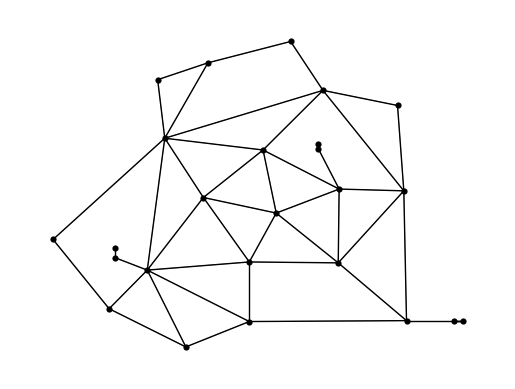

In [2]:
# Read and plot the water network using wntr
wn = wntr.network.WaterNetworkModel("networks/Anytown.inp")
wntr.graphics.plot_network(wn);

## Run simulations to analyze the diffusion of a contaminant
WaCo allows to simply analyze the diffusion of a contaminant in the network, considering different injection points, by using the `waco.sim.contamination` function. This function runs a [water quality simulation](https://usepa.github.io/WNTR/waterquality.html) for each injection points specified by the parameter `inj_nodes`; by default, all the junctions of the network are considered as injection points. For each simulation, the varying contaminant concentration (percentage) is tracked across the entire network.

This results in a dataframe in which, each column represents an injection node (except for the "time" and "node" columns that are row ids) and each row represents the contaminant concentration in a node of the network at a specific simulation time for all the injection nodes.

In [3]:
trace = waco.sim.contamination(wn=wn)
trace

,time,node,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
0,0,1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,3,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,4,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,5,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,86400,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
621,86400,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
622,86400,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
623,86400,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(f"Columns: {list(trace.columns)}")
print(f"Simulation timesteps: {trace['time'].unique().tolist()}")
print(f"Water network nodes: {trace['node'].unique().tolist()}")

Columns: ['time', 'node', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']
Simulation timesteps: [0, 3600, 7200, 10800, 14400, 18000, 21600, 25200, 28800, 32400, 36000, 39600, 43200, 46800, 50400, 54000, 57600, 61200, 64800, 68400, 72000, 75600, 79200, 82800, 86400]
Water network nodes: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '40', '41', '42']


It is possible to change the injection nodes as well as the simulation duration and timestep (in seconds).

In the following example, the injection points are limited to the nodes with ids "1", "2", "21" and "22", the simulation duration is set to 5 hours and data are registered every 15 minutes.

In [5]:
trace = waco.sim.contamination(wn=wn,
                               inj_nodes=["1", "2", "21", "22"],
                               duration=5 * 3600,  # 5 hours
                               timestep=15 * 60)  # 15 minutes
trace

,time,node,1,2,21,22
0,0,1,100.0,0.0,0.0,0.0
1,0,2,0.0,100.0,0.0,0.0
2,0,3,0.0,0.0,0.0,0.0
3,0,4,0.0,0.0,0.0,0.0
4,0,5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
520,18000,21,0.0,0.0,100.0,0.0
521,18000,22,0.0,0.0,0.0,100.0
522,18000,40,0.0,0.0,0.0,0.0
523,18000,41,0.0,0.0,0.0,0.0


In [6]:
print(f"Columns: {list(trace.columns)}")
print(f"Simulation timesteps: {trace['time'].unique().tolist()}")
print(f"Water network nodes: {trace['node'].unique().tolist()}")

Columns: ['time', 'node', '1', '2', '21', '22']
Simulation timesteps: [0, 900, 1800, 2700, 3600, 4500, 5400, 6300, 7200, 8100, 9000, 9900, 10800, 11700, 12600, 13500, 14400, 15300, 16200, 17100, 18000]
Water network nodes: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '40', '41', '42']


Then, the `wntr.graphics` module can be used to plot this data on the network.

In the following example nodes are colored based on the contaminant concentration at the end of the simulation (18000 seconds), considering contaminante injected in node "1".

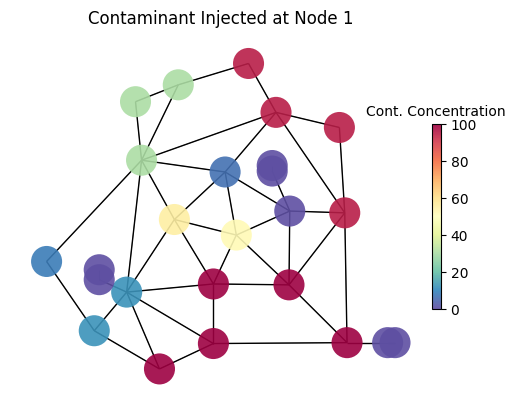

In [7]:
node_attribute = trace.loc[trace["time"] == 18000, ["node", "1"]].set_index("node")["1"]
wntr.graphics.plot_network(wn,
                           node_size=500,
                           node_alpha=0.9,
                           node_colorbar_label="Cont. Concentration",
                           node_attribute=node_attribute,
                           title="Contaminant Injected at Node 1");

For more generic plots (e.g., timeseries), the `matplotlib` library can be directly used, as in the following example.

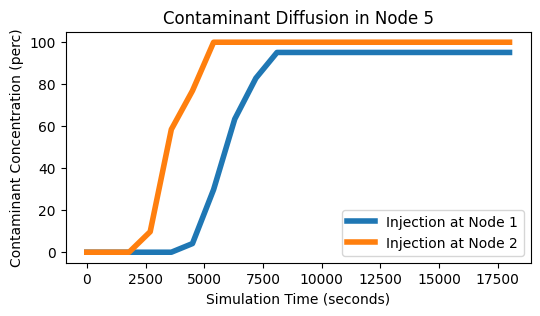

In [8]:
timeseries_1 = trace.loc[trace["node"] == "5", ["time", "1"]]
timeseries_2 = trace.loc[trace["node"] == "5", ["time", "2"]]
plt.figure(figsize=(6, 3))
plt.plot(timeseries_1["time"], timeseries_1["1"], linewidth=4, label="Injection at Node 1")
plt.plot(timeseries_2["time"], timeseries_2["2"], linewidth=4, label="Injection at Node 2")
plt.xlabel("Simulation Time (seconds)")
plt.ylabel("Contaminant Concentration (perc)")
plt.title("Contaminant Diffusion in Node 5")
plt.legend();

## Compute the Detection Times
A useful insight is how long it takes to detect the contaminant at a specific location of the network (e.g., node). Considering that the contaminant is detected at a node when it exceeds a concentration percentage (`sensibility`), the function `waco.analyzer.detection_time` can be used to compute the detection times.

In [9]:
det_time = waco.analyzer.detection_time(trace, sensibility=5)
det_time

,node,inj_node,time
0,1,1,0.0
1,1,2,18900.0
2,1,21,18900.0
3,1,22,18900.0
4,10,1,11700.0
...,...,...,...
95,8,22,2700.0
96,9,1,15300.0
97,9,2,18900.0
98,9,21,18900.0


Another information that can be extracted from the simulations is the volume of contaminated water consumed prior to detection. First, the water demands at each node have to be computed using the `waco.sim.demand` function. Then, the `waco.analyzer.contaminated_volume` function can be used to compute the volume of contaminated water.

> **Note:** The same time granularity (`duration` and `timestep`) is required for both the `demand` and `trace` to be able to compute the volume of contaminated water.

In [10]:
demand = waco.sim.water_demand(wn, 
                               duration=5 * 3600, # 5 hours
                               timestep=15 * 60)  # 15 minutes
demand

,time,node,demand
0,0,1,0.031545
1,0,2,0.012618
2,0,3,0.012618
3,0,4,0.037854
4,0,5,0.037854
...,...,...,...
520,18000,21,0.000000
521,18000,22,0.000000
522,18000,40,0.000000
523,18000,41,0.000000


In [11]:
contam_vol = waco.analyzer.contaminated_volume(trace=trace,
                                               det_time=det_time,
                                               demand=demand)
contam_vol

,node,inj_node,volume
0,1,1,0.031545
1,1,2,0.116008
2,1,21,0.118453
3,1,22,0.122800
4,10,1,0.289773
...,...,...,...
95,8,22,0.077663
96,9,1,0.326106
97,9,2,0.116008
98,9,21,0.118453
